In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os 

plt.rcParams["font.family"] = "Times New Roman"


In [3]:
rawpath = './Raw Data'

filenames = os.listdir(rawpath)
filenames.sort()

stationA = pd.DataFrame(columns=['time','batt_num'])
stationB = pd.DataFrame(columns=['time','batt_num'])

for f in filenames:
    if 'B' in f:
        raw = pd.read_csv(rawpath+'/'+f)
        stationB = pd.concat([stationB,raw])
    elif 'A' in f:
        raw = pd.read_csv(rawpath+'/'+f)
        stationA = pd.concat([stationA,raw])
    else:
        continue

stationA.to_csv('stationA.csv',index=False)
stationB.to_csv('stationB.csv',index=False)

In [4]:
stationA = pd.read_csv('stationA.csv')
stationB = pd.read_csv('stationB.csv')

stationA['time'] = pd.to_datetime(stationA['time'])
stationA = stationA.drop_duplicates(subset='time')
stationA.set_index('time', inplace=True)  # Set as DatetimeIndex

stationB['time'] = pd.to_datetime(stationB['time'])
stationB = stationB.drop_duplicates(subset='time')
stationB.set_index('time', inplace=True)  # Set as DatetimeIndex

In [7]:
stationA_hourly = stationA.resample('h').nearest(limit=1)
stationB_hourly = stationB.resample('h').nearest(limit=1)

stationA_hourly.to_csv('stationA_hourly.csv',index=False)
stationB_hourly.to_csv('stationB_hourly.csv',index=False)

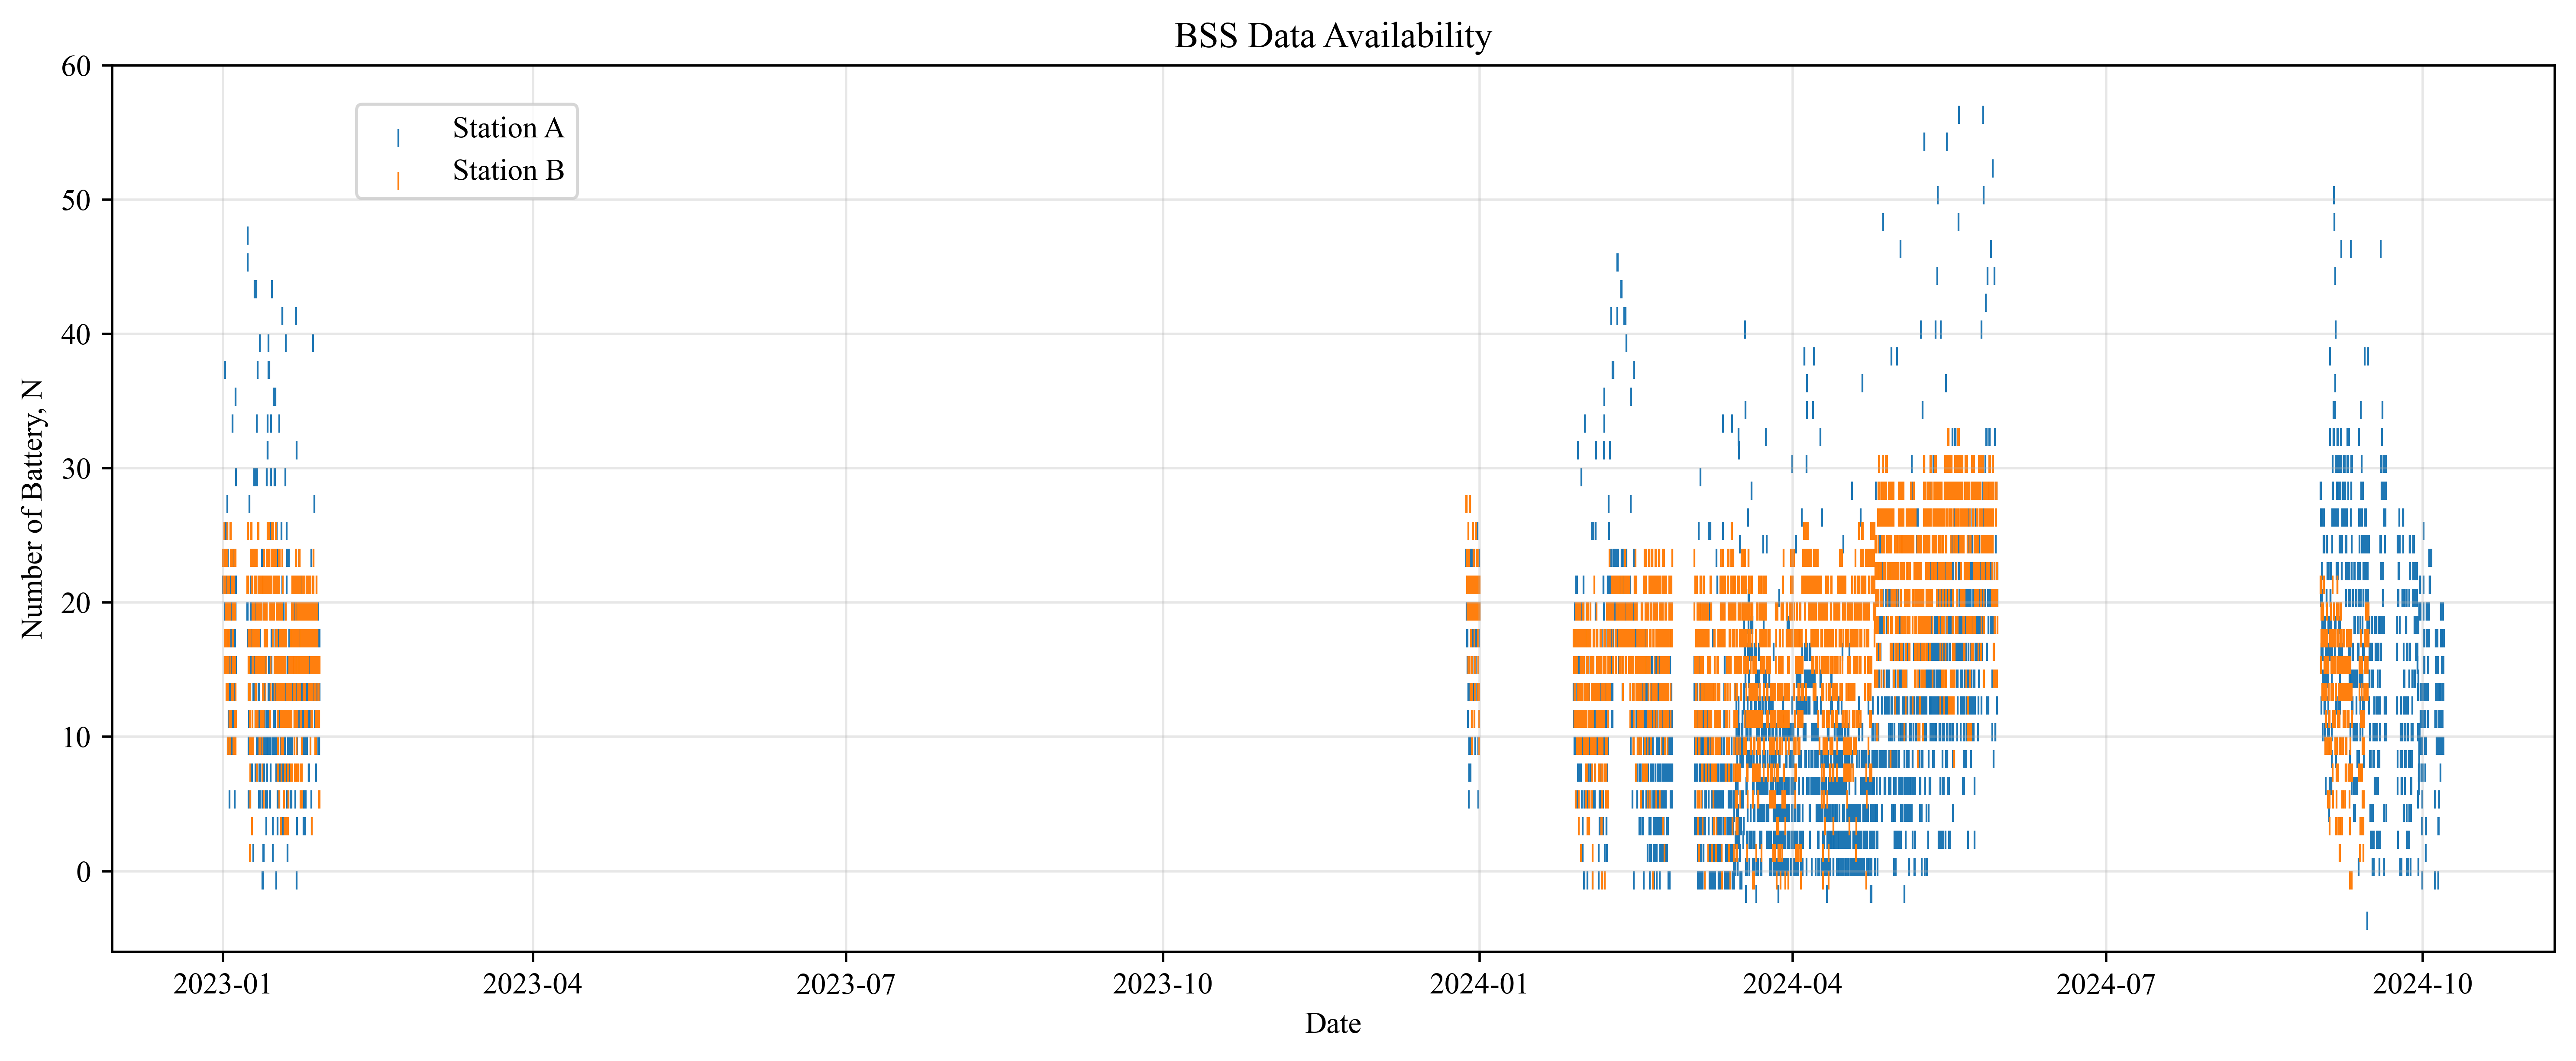

In [6]:
plt.figure(figsize=(12,5),dpi=500)

plt.grid(True, alpha=0.3)
plt.title('BSS Data Availability', fontsize = 12)
plt.scatter(stationA_hourly.index, stationA_hourly['batt_num'],marker=3,linewidths=0.6,label="Station A")
plt.scatter(stationB_hourly.index, stationB_hourly['batt_num'],marker=3,linewidths=0.6,label="Station B")

plt.ylabel('Number of Battery, N', fontsize=10)
plt.xlabel('Date', fontsize=10)

plt.legend(loc=[0.1,0.85],fontsize = 10)
plt.tight_layout()

plt.savefig('../Figures/BSS_Data_Availability.png',dpi='figure', format='png')